### Escuela Politécnica Nacional ###

**Nombre:** Marco Marcillo, Mateo Molina

**Tema:** [Taller 2b] Métodos iterativos

**Repositorio GIT:** https://github.com/Alejandro0122/Metodos-Numericos-2025A

In [11]:
from src.iterative_methods import gauss_jacobi
from src.iterative_methods import gauss_seidel

### Gauss Jacobi

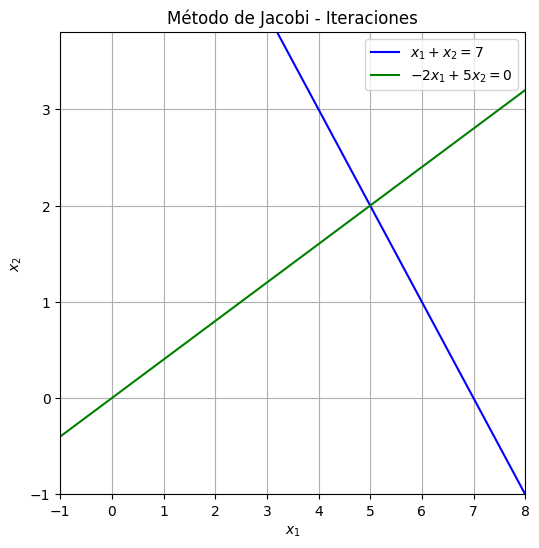

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# =================== Sistema de la imagen ===================
# x1 + x2 = 7
# -2x1 + 5x2 = 0
# X0 = (5,2)
A = np.array([[1, 1],
              [-2, 5]], dtype=float)
b = np.array([[7],
              [0]], dtype=float)
x0 = np.array([[0],
               [0]], dtype=float)

# =================== Método Jacobi ===================
def gauss_jacobi(A, b, x0, tol=1e-6, max_iter=20):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = x0.copy()
    tray = [x.copy()]
    n = A.shape[0]
    for k in range(1, max_iter):
        x_new = np.zeros((n,1))
        for i in range(n):
            suma = sum([A[i,j]*x[j] for j in range(n) if j != i])
            x_new[i] = (b[i]-suma)/A[i,i]
        tray.append(x_new.copy())
        if np.linalg.norm(x_new-x) < tol:
            break
        x = x_new.copy()
    return np.hstack(tray)

# =================== Obtener trayectoria ===================
tray = gauss_jacobi(A, b, x0, tol=1e-6, max_iter=20)
# Asegurar que son arreglos 1D
x1_vals = np.array(tray[0, :]).flatten()
x2_vals = np.array(tray[1, :]).flatten()

# =================== Figura base ===================
fig, ax = plt.subplots(figsize=(6,6))

# Dibujar las rectas del sistema
x = np.linspace(-1, 8, 200)
ax.plot(x, 7 - x, 'b-', label=r'$x_1 + x_2 = 7$')
ax.plot(x, (2/5)*x, 'g-', label=r'$-2x_1 + 5x_2 = 0$')

# Limites de la gráfica
ax.set_xlim(min(x1_vals)-1, max(x1_vals)+1)
ax.set_ylim(min(x2_vals)-1, max(x2_vals)+1)

# Etiquetas y título
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Método de Jacobi - Iteraciones')
ax.grid(True)
ax.legend()

# Elementos dinámicos
punto, = ax.plot([], [], 'ro', markersize=8)        # punto actual
trayectoria, = ax.plot([], [], 'r--', lw=1)         # trayectoria
texto = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# =================== Funciones de animación ===================
def init():
    punto.set_data([], [])
    trayectoria.set_data([], [])
    texto.set_text('')
    return punto, trayectoria, texto

def update(frame):
    # actualizar trayectoria acumulada
    trayectoria.set_data(x1_vals[:frame+1], x2_vals[:frame+1])
    # actualizar punto actual (¡ojo con los corchetes!)
    punto.set_data([x1_vals[frame]], [x2_vals[frame]])
    texto.set_text(f'Iteración {frame}\nX=({x1_vals[frame]:.4f}, {x2_vals[frame]:.4f})')
    return punto, trayectoria, texto

# Crear animación
ani = FuncAnimation(fig, update, frames=len(x1_vals),
                    init_func=init, interval=800, blit=True, repeat=False)

plt.show()

ani.save('jacobi_inicial(0-0).gif', writer='pillow', fps=1)



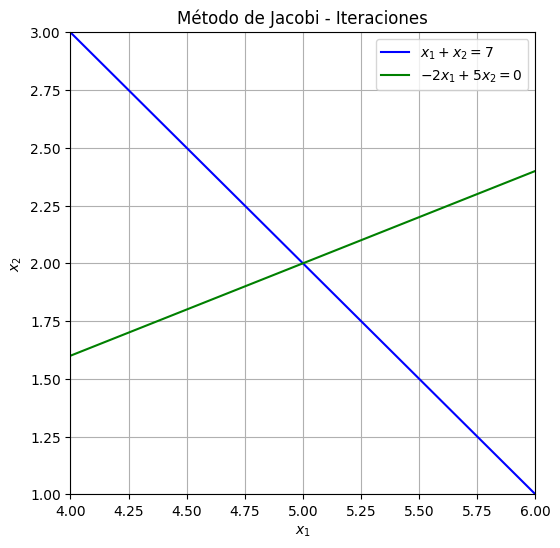

In [36]:
A = np.array([[1, 1],
              [-2, 5]], dtype=float)
b = np.array([[7],
              [0]], dtype=float)
x0 = np.array([[5],
               [2]], dtype=float)

# =================== Método Jacobi ===================
def gauss_jacobi(A, b, x0, tol=1e-6, max_iter=20):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = x0.copy()
    tray = [x.copy()]
    n = A.shape[0]
    for k in range(1, max_iter):
        x_new = np.zeros((n,1))
        for i in range(n):
            suma = sum([A[i,j]*x[j] for j in range(n) if j != i])
            x_new[i] = (b[i]-suma)/A[i,i]
        tray.append(x_new.copy())
        if np.linalg.norm(x_new-x) < tol:
            break
        x = x_new.copy()
    return np.hstack(tray)

# =================== Obtener trayectoria ===================
tray = gauss_jacobi(A, b, x0, tol=1e-6, max_iter=20)
# Asegurar que son arreglos 1D
x1_vals = np.array(tray[0, :]).flatten()
x2_vals = np.array(tray[1, :]).flatten()

# =================== Figura base ===================
fig, ax = plt.subplots(figsize=(6,6))

# Dibujar las rectas del sistema
x = np.linspace(-1, 8, 200)
ax.plot(x, 7 - x, 'b-', label=r'$x_1 + x_2 = 7$')
ax.plot(x, (2/5)*x, 'g-', label=r'$-2x_1 + 5x_2 = 0$')

# Limites de la gráfica
ax.set_xlim(min(x1_vals)-1, max(x1_vals)+1)
ax.set_ylim(min(x2_vals)-1, max(x2_vals)+1)

# Etiquetas y título
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Método de Jacobi - Iteraciones')
ax.grid(True)
ax.legend()

# Elementos dinámicos
punto, = ax.plot([], [], 'ro', markersize=8)        # punto actual
trayectoria, = ax.plot([], [], 'r--', lw=1)         # trayectoria
texto = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# =================== Funciones de animación ===================
def init():
    punto.set_data([], [])
    trayectoria.set_data([], [])
    texto.set_text('')
    return punto, trayectoria, texto

def update(frame):
    # actualizar trayectoria acumulada
    trayectoria.set_data(x1_vals[:frame+1], x2_vals[:frame+1])
    # actualizar punto actual (¡ojo con los corchetes!)
    punto.set_data([x1_vals[frame]], [x2_vals[frame]])
    texto.set_text(f'Iteración {frame}\nX=({x1_vals[frame]:.4f}, {x2_vals[frame]:.4f})')
    return punto, trayectoria, texto

# Crear animación
ani = FuncAnimation(fig, update, frames=len(x1_vals),
                    init_func=init, interval=800, blit=True, repeat=False)

plt.show()

ani.save('jacobi_inicial(5-2).gif', writer='pillow', fps=1)


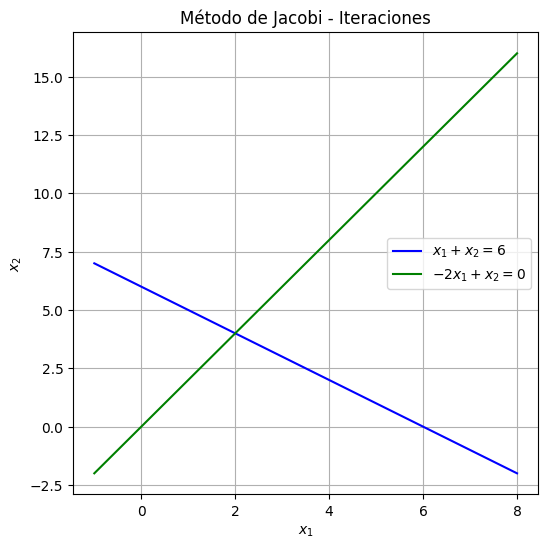

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

A = np.array([[1, 1],
              [-2, 1]], dtype=float)
b = np.array([[6],
              [0]], dtype=float)
x0 = np.array([[1],
               [-2]], dtype=float)

def gauss_jacobi(A, b, x0, tol=1e-6, max_iter=20):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = x0.copy()
    tray = [x.copy()]
    n = A.shape[0]
    for k in range(1, max_iter):
        x_new = np.zeros((n,1))
        for i in range(n):
            suma = sum([A[i,j]*x[j] for j in range(n) if j != i])
            x_new[i] = (b[i]-suma)/A[i,i]
        tray.append(x_new.copy())
        if np.linalg.norm(x_new-x) < tol:
            break
        x = x_new.copy()
    return np.hstack(tray)

tray = gauss_jacobi(A, b, x0, tol=1e-6, max_iter=20)
x1_vals = np.array(tray[0, :]).flatten()
x2_vals = np.array(tray[1, :]).flatten()

fig, ax = plt.subplots(figsize=(6,6))

# Dibujar las rectas fijas del sistema
x = np.linspace(-1, 8, 200)
ax.plot(x, 6 - x, 'b-', label=r'$x_1 + x_2 = 6$')
ax.plot(x, 2*x, 'g-', label=r'$-2x_1 + x_2 = 0$')

# Etiquetas y título
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Método de Jacobi - Iteraciones')
ax.grid(True)
ax.legend()

punto, = ax.plot([], [], 'ro', markersize=8)
trayectoria, = ax.plot([], [], 'r--', lw=1)
texto = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    punto.set_data([], [])
    trayectoria.set_data([], [])
    texto.set_text('')
    return punto, trayectoria, texto

def update(frame):
    # Actualizar trayectoria
    x1_frame = x1_vals[:frame+1]
    x2_frame = x2_vals[:frame+1]
    trayectoria.set_data(x1_frame, x2_frame)
    # punto.set_data(x1_vals[frame], x2_vals[frame])
    texto.set_text(f'Iteración {frame}\nX=({x1_vals[frame]:.4f}, {x2_vals[frame]:.4f})')
    
    # Ajustar límites dinámicamente con un pequeño margen
    margen = 0.5
    xmin, xmax = min(x1_frame), max(x1_frame)
    ymin, ymax = min(x2_frame), max(x2_frame)
    ax.set_xlim(xmin - margen, xmax + margen)
    ax.set_ylim(ymin - margen, ymax + margen)
    
    return punto, trayectoria, texto

ani = FuncAnimation(fig, update, frames=len(x1_vals),
                    init_func=init, interval=800, blit=True, repeat=False)

plt.show()


ani.save('jacobi2_inicial(1-2).gif', writer='pillow', fps=1)

### Gauss Seidel

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Gauss-Jacobi ----------------
def gauss_jacobi(*, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int):
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "A debe ser cuadrada"

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "b debe tener dimensión compatible con A"

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "x0 debe tener tamaño n"

    n = A.shape[0]
    x = x0.copy()
    tray = [x.copy()]

    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        tray.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new.copy()

    return x, tray

# ---------------- Función para graficar ----------------
def plot_sistema(A, b, eq_lines, eq_labels, title, x0_list):
    plt.figure(figsize=(8, 8))
    colors = plt.cm.plasma(np.linspace(0, 1, len(x0_list)))

    for i, x0_vals in enumerate(x0_list):
        x0 = np.array(x0_vals, dtype=float).reshape(-1, 1)
        solucion, trayectoria = gauss_jacobi(A=A, b=b, x0=x0, tol=1e-5, max_iter=50)
        puntos = np.hstack(trayectoria)

        # Trazo de la trayectoria
        plt.plot(puntos[0], puntos[1], '-o', color=colors[i], label=f'X₀={x0_vals}')

        # Punto inicial
        plt.plot(puntos[0, 0], puntos[1, 0], '*', color=colors[i], markersize=12, label=f'Inicio {i+1}')

        # Punto final
        plt.plot(puntos[0, -1], puntos[1, -1], 's', color=colors[i], markersize=10, label=f'Solución {i+1}')

      

        # 👉 Mostrar en consola las iteraciones y solución final
        print(f'\n👉 Punto inicial {i+1}: {x0_vals}')
        print(f'   Iteraciones: {len(trayectoria) - 1}')
        print(f'   Solución aproximada: x = {solucion.ravel()}')

    # Rectas del sistema
    x_vals = np.linspace(-5, 10, 400)
    for y_func, label, estilo in zip(eq_lines, eq_labels, ['r--', 'b--']):
        y_vals = y_func(x_vals)
        plt.plot(x_vals, y_vals, estilo, label=label)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


from src.iterative_methods import gauss_seidel

def plot_sistema_seidel(A, b, eq_lines, eq_labels, title, x0_list):
    plt.figure(figsize=(8, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(x0_list)))

    for i, x0_vals in enumerate(x0_list):
        x0 = np.array(x0_vals, dtype=float).reshape(-1, 1)
        solucion, trayectoria = gauss_seidel(A=A, b=b, x0=x0, tol=1e-5, max_iter=50)
        puntos = np.hstack(trayectoria)

        # Trazo de la trayectoria
        plt.plot(puntos[0], puntos[1], '-o', color=colors[i], label=f'X₀={x0_vals}')

        # Punto inicial
        plt.plot(puntos[0, 0], puntos[1, 0], '*', color=colors[i], markersize=12, label=f'Inicio {i+1}')

        # Punto final
        plt.plot(puntos[0, -1], puntos[1, -1], 's', color=colors[i], markersize=10, label=f'Solución {i+1}')

        # Números de iteración
        for j in range(puntos.shape[1]):
            x_j, y_j = puntos[0, j], puntos[1, j]
            plt.text(x_j + 0.1, y_j + 0.1, f'{j}', fontsize=9, color=colors[i])

        # Mostrar info por consola
        print(f'\n👉 Punto inicial {i+1}: {x0_vals}')
        print(f'   Iteraciones: {len(trayectoria) - 1}')
        print(f'   Solución aproximada: x = {solucion.ravel()}')

    # Rectas del sistema
    x_vals = np.linspace(-5, 10, 400)
    for y_func, label, estilo in zip(eq_lines, eq_labels, ['r--', 'b--']):
        y_vals = y_func(x_vals)
        plt.plot(x_vals, y_vals, estilo, label=label)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title + ' (Gauss-Seidel)')
    plt.legend()
    plt.grid(True)
    plt.show()


[07-15 21:07:01][INFO] 2025-07-15 21:07:01.532626
[07-15 21:07:01][INFO] 2025-07-15 21:07:01.539640


[07-15 21:09:55][INFO] i= 0 x: [[4. 2.]]
[07-15 21:09:55][INFO] i= 1 x: [[5. 2.]]

👉 Punto inicial 1: [4, 2]
   Iteraciones: 1
   Solución aproximada: x = [5. 2.]
[07-15 21:09:55][INFO] i= 0 x: [[0. 0.]]
[07-15 21:09:55][INFO] i= 1 x: [[7.  2.8]]
[07-15 21:09:55][INFO] i= 2 x: [[4.2  1.68]]
[07-15 21:09:55][INFO] i= 3 x: [[5.32  2.128]]
[07-15 21:09:55][INFO] i= 4 x: [[4.872  1.9488]]
[07-15 21:09:55][INFO] i= 5 x: [[5.0512  2.02048]]
[07-15 21:09:55][INFO] i= 6 x: [[4.97952  1.991808]]
[07-15 21:09:55][INFO] i= 7 x: [[5.008192  2.0032768]]
[07-15 21:09:55][INFO] i= 8 x: [[4.9967232  1.99868928]]
[07-15 21:09:55][INFO] i= 9 x: [[5.00131072 2.00052429]]
[07-15 21:09:55][INFO] i= 10 x: [[4.99947571 1.99979028]]
[07-15 21:09:55][INFO] i= 11 x: [[5.00020972 2.00008389]]
[07-15 21:09:55][INFO] i= 12 x: [[4.99991611 1.99996645]]
[07-15 21:09:55][INFO] i= 13 x: [[5.00003355 2.00001342]]
[07-15 21:09:55][INFO] i= 14 x: [[4.99998658 1.99999463]]
[07-15 21:09:55][INFO] i= 15 x: [[5.00000537 2.00

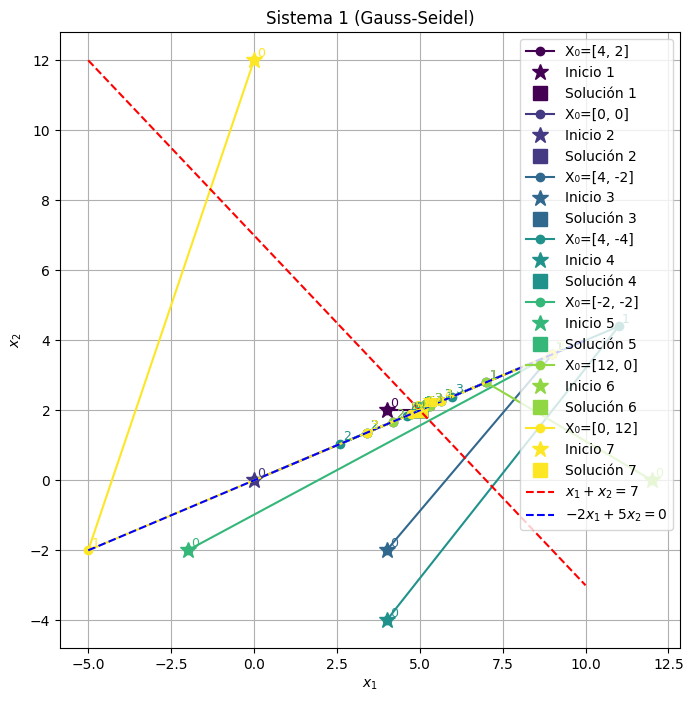

In [62]:
# ---------------- Sistema 1 ----------------
A1 = np.array([[1, 1],
               [-2, 5]], dtype=float)
b1 = np.array([[7],
               [0]], dtype=float)

# puntos iniciales 
x0_list_1 = [
    [4,2],
    [0, 0],
    [4,-2],
     [4,-4],
      [-2,-2],
      [12,0],
      [0,12]
]

plot_sistema_seidel(
    A=A1,
    b=b1,
    eq_lines=[
        lambda x: 7 - x,
        lambda x: (2 * x) / 5
    ],
    eq_labels=[
        '$x_1 + x_2 = 7$',
        '$-2x_1 + 5x_2 = 0$'
    ],
    title='Sistema 1',
    x0_list=x0_list_1
)



[07-15 21:09:23][INFO] i= 0 x: [[5. 2.]]
[07-15 21:09:23][INFO] i= 1 x: [[4. 8.]]
[07-15 21:09:23][INFO] i= 2 x: [[-2. -4.]]
[07-15 21:09:23][INFO] i= 3 x: [[10. 20.]]
[07-15 21:09:23][INFO] i= 4 x: [[-14. -28.]]
[07-15 21:09:23][INFO] i= 5 x: [[34. 68.]]
[07-15 21:09:23][INFO] i= 6 x: [[ -62. -124.]]
[07-15 21:09:23][INFO] i= 7 x: [[130. 260.]]
[07-15 21:09:23][INFO] i= 8 x: [[-254. -508.]]
[07-15 21:09:23][INFO] i= 9 x: [[ 514. 1028.]]
[07-15 21:09:23][INFO] i= 10 x: [[-1022. -2044.]]
[07-15 21:09:23][INFO] i= 11 x: [[2050. 4100.]]
[07-15 21:09:23][INFO] i= 12 x: [[-4094. -8188.]]
[07-15 21:09:23][INFO] i= 13 x: [[ 8194. 16388.]]
[07-15 21:09:23][INFO] i= 14 x: [[-16382. -32764.]]
[07-15 21:09:23][INFO] i= 15 x: [[32770. 65540.]]
[07-15 21:09:23][INFO] i= 16 x: [[ -65534. -131068.]]
[07-15 21:09:23][INFO] i= 17 x: [[131074. 262148.]]
[07-15 21:09:23][INFO] i= 18 x: [[-262142. -524284.]]
[07-15 21:09:23][INFO] i= 19 x: [[ 524290. 1048580.]]
[07-15 21:09:23][INFO] i= 20 x: [[-1048574. 

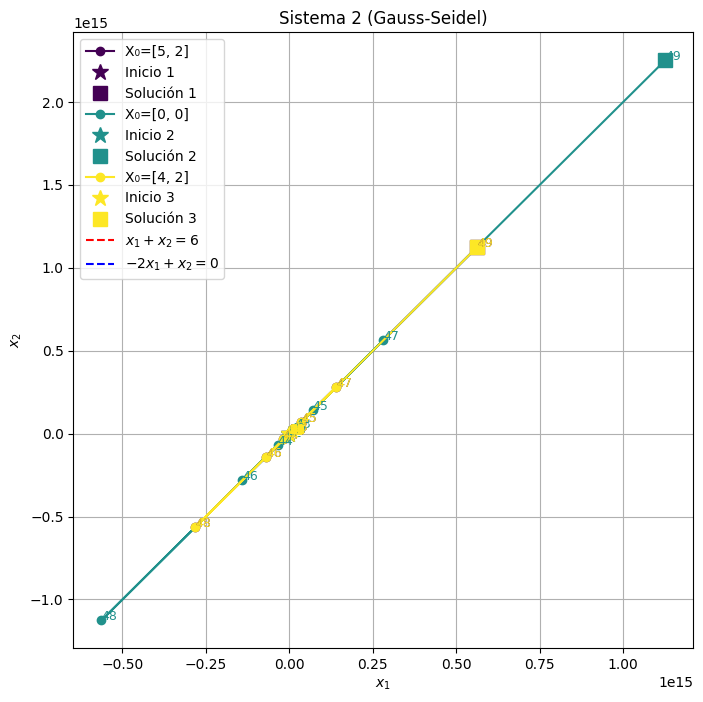

In [ ]:

# ---------------- Sistema 2 ----------------
A2 = np.array([[1, 1],
               [-2, 1]], dtype=float)
b2 = np.array([[6],
               [0]], dtype=float)

x0_list_2 = [
    [5, 2],
    [0, 0],
    [4,2]
]

plot_sistema_seidel(
    A=A2,
    b=b2,
    eq_lines=[
        lambda x: 6 - x,
       lambda x: (2 * x) / 5
    ],
    eq_labels=[
        '$x_1 + x_2 = 6$',
        '$-2x_1 + x_2 = 0$'
    ],
    title='Sistema 2',
    x0_list=x0_list_2
)
